In [1]:
from fun.border_zone import *

## 1. Load the images and the Mueller Matrices

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

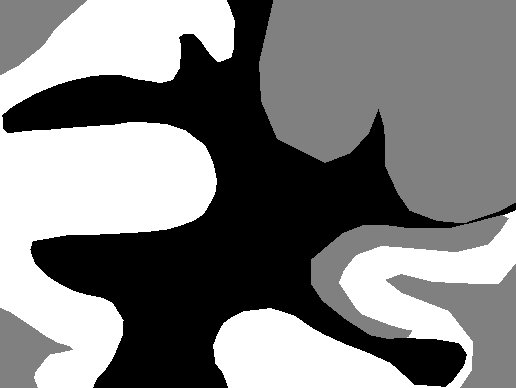

In [22]:
# 1. set the data paths
path_folder_fresh = './data/fresh/'
path_folder_fixed = './data/fixed/'

# 2. set global variables (i.e. wavelength of interest, folder in which to save the results and keys for the parameters to keep)
wavelength = '550nm'
to_keep = ['M11', 'Msk', 'totD', 'linR', 'azimuth', 'totP']
folder_save_fresh = './results/' + path_folder_fresh.split('/')[-2]
folder_save_fixed = './results/' + path_folder_fixed.split('/')[-2]

# 3. if necessary, uncomment to re-process the grey/white matter masks
# create_the_masks(path_folder, '')
# create_the_masks(path_folder_fixed, '')

# 4. load the variables and save the paths for the images
paths_fresh, variables_fresh = load_variables_and_paths(path_folder_fresh, wavelength = wavelength, to_keep = to_keep)
paths_fixed, variables_fixed = load_variables_and_paths(path_folder_fixed, wavelength = wavelength, to_keep = to_keep)

Image.fromarray(variables_fresh[list(variables_fresh.keys())[0]]['annotation'].astype("uint8"))

Here, the annotation (GM/WM/BG) is represented for one fresh image

## 2. Create the border masks

In [23]:
# define the color map for the so-called 'rainbow plot'
color_map = {1: [255, 0, 0], 2: [255, 83, 0], 3: [255, 165, 0], 4: [255, 210, 0], 5: [255, 255, 0],
            6: [128, 192, 0], 7: [0, 128, 0], 8: [0, 64, 128], 9: [0, 0, 255], 10: [38, 0, 193], 11: [75, 0, 130]}

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

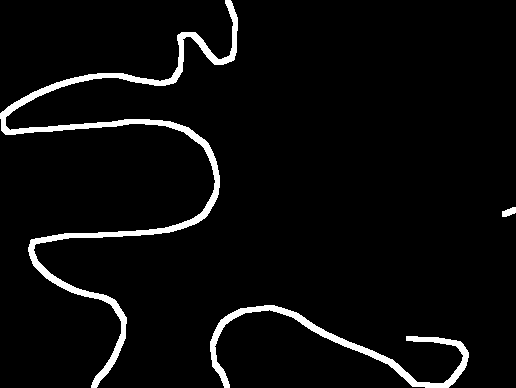

In [32]:
# 1. set the number of iteration for each dilation step and the number of dilation step
iterations_dilation = 9
number_of_dilations = 6

# 2. set the parameter of interest (only implemented is depolarization)
parameter = 'depolarization'

# 3. obtain and dilate the border region
res_fresh = dilate_images(variables_fresh, iterations_dilation, number_of_dilations, parameter, color_map)
res_fixed = dilate_images(variables_fixed, iterations_dilation, number_of_dilations, parameter, color_map)

Image.fromarray((res_fresh[1][list(variables_fresh.keys())[0]]*255).astype("uint8"))

The border region obtained for the fresh image shown earlier is represented above, and the different regions obtained during the dillation process below

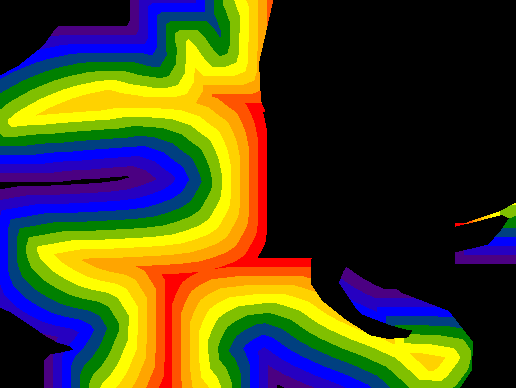

In [33]:
Image.fromarray((res_fresh[3][list(variables_fresh.keys())[0]]).astype("uint8"))

### 2.1. Save the border pixel images and the dilated images

In [34]:
save_the_images(res_fresh[1], res_fresh[3], folder_save_fresh)
save_the_images(res_fixed[1], res_fixed[3], folder_save_fixed)

### 2.2. Plot the the parameter values according to the distance

#### 2.2.1 Fresh tissue

  0%|          | 0/11 [00:00<?, ?it/s]

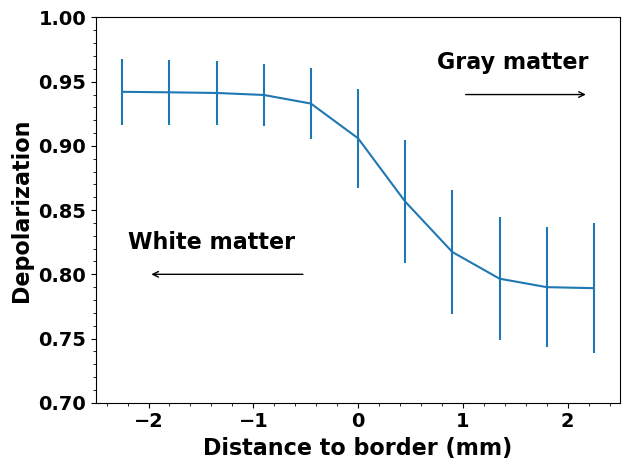

In [35]:
fig_fresh, x_scaled_sorted_fresh, organized_by_distance_means_fresh = get_complete_plot_data(res_fresh[0], 
                                                                        folder_save_fresh, parameter, 
                                                                        iterations_dilation, number_of_dilations)

#### 2.2.2 Fixed tissue

  0%|          | 0/11 [00:00<?, ?it/s]

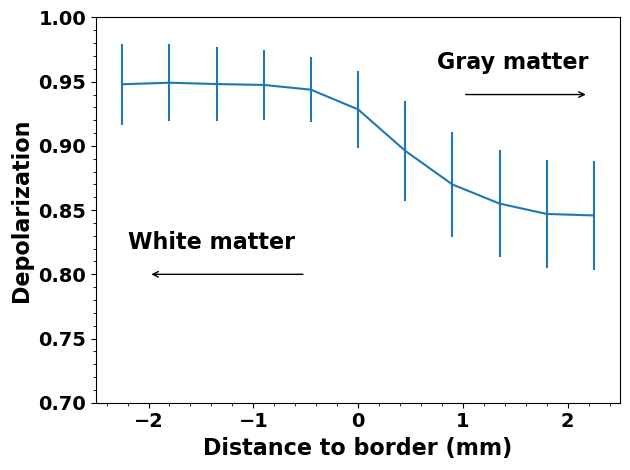

In [36]:
fig_fixed, x_scaled_sorted_fixed, organized_by_distance_means_fixed = get_complete_plot_data(res_fixed[0], 
                                                                        folder_save_fixed, parameter, 
                                                                        iterations_dilation, number_of_dilations)

### 2.3. Try to fit a function
The curve looks like a sigmoid - try to fit a sigmoid 

#### 2.3.1 Fixed tissue

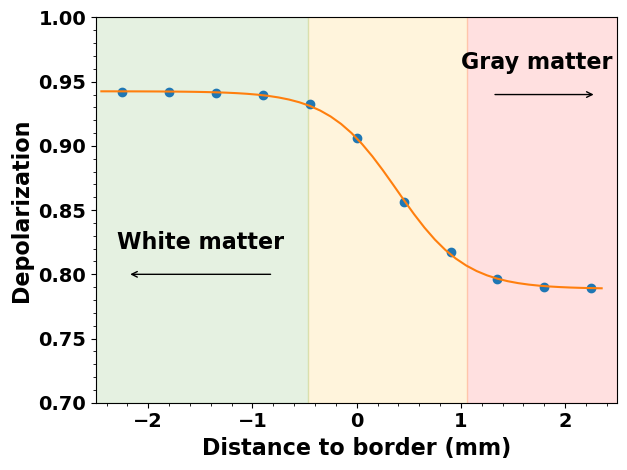

In [37]:
fig_fresh, elbows_fresh = fit_and_plot_sigmoid(x_scaled_sorted_fresh, organized_by_distance_means_fresh, 
                                 folder_save_fresh, parameter, wavelength)

#### 2.3.2 Fixed tissue

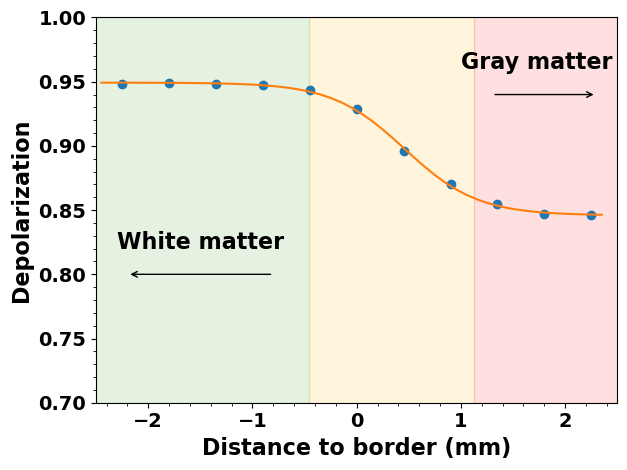

In [38]:
fig_fixed, elbows_fixed = fit_and_plot_sigmoid(x_scaled_sorted_fixed, organized_by_distance_means_fixed, 
                                 folder_save_fixed, parameter, wavelength)

In [39]:
print(elbows_fresh, elbows_fixed)

[-0.4666999999958148, 1.0563] [-0.4583999999957973, 1.1287]


#### For fresh:
There is an elbow for $x = - 0.47 mm$ and for $x = 1.06 mm$

Transition Region = $1.53mm$

#### For fixed:
There is an elbow for $x = - 0.46 mm$ and for $x = 1.13 mm$

Transition Region = $1.59mm$

## 3. Generate the transition region on the image - for the figure of the paper

In [40]:
var_fresh = list(res_fresh[0].keys())[0]
var_fixed = list(res_fixed[0].keys())[0]
distance_pixel = 0.05

  0%|          | 0/388 [00:00<?, ?it/s]

  0%|          | 0/388 [00:00<?, ?it/s]

  0%|          | 0/388 [00:00<?, ?it/s]

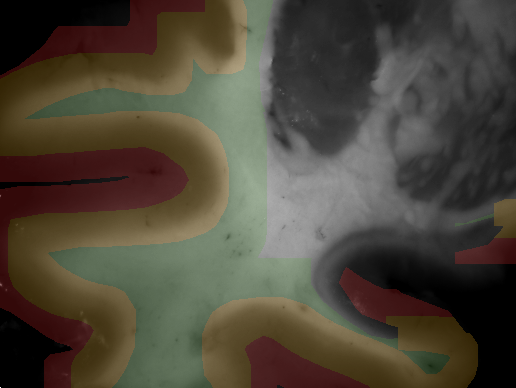

In [41]:
generate_transition_region_on_the_image(res_fresh[1][var_fresh], res_fresh[2][var_fresh], 
                                        variables_fresh, distance_pixel, elbows_fresh, var_fresh, folder_save_fresh)

  0%|          | 0/388 [00:00<?, ?it/s]

  0%|          | 0/388 [00:00<?, ?it/s]

  0%|          | 0/388 [00:00<?, ?it/s]

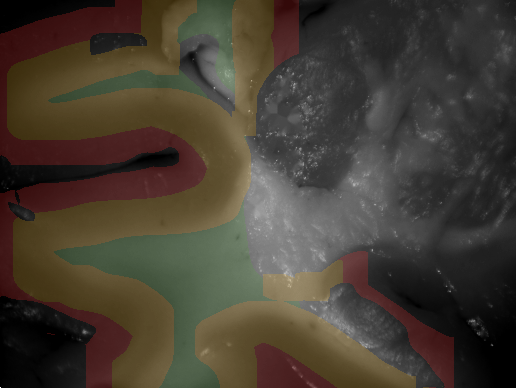

In [42]:
generate_transition_region_on_the_image(res_fixed[1][var_fixed], res_fixed[2][var_fixed], 
                                        variables_fixed, distance_pixel, elbows_fixed, var_fixed, folder_save_fixed)